# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.

Module 17.1 Rubrik: https://classroom.emeritus.org/courses/9414/assignments/276508?module_item_id=2090340

### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [10]:
ans = '17'
print(ans)

17


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

In [12]:
df = pd.read_csv('bank-additional-full.csv', sep = ';')

In [13]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Raw data plots

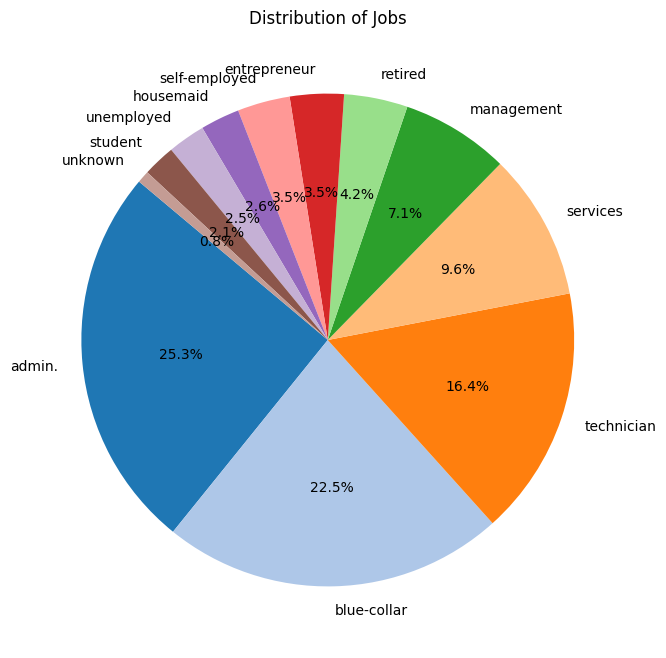

In [14]:
# pie chart for jobs
job_counts = df['job'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Jobs')
plt.savefig('images/jobs_pie_chart.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

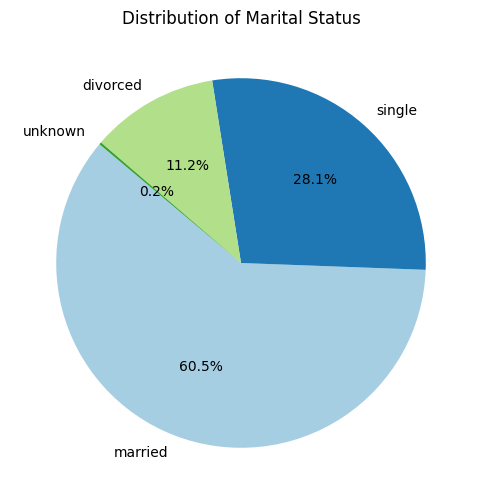

In [15]:
# pie chart for marital status
marital_counts = df['marital'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Marital Status')
plt.savefig('images/marital_pie_chart.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

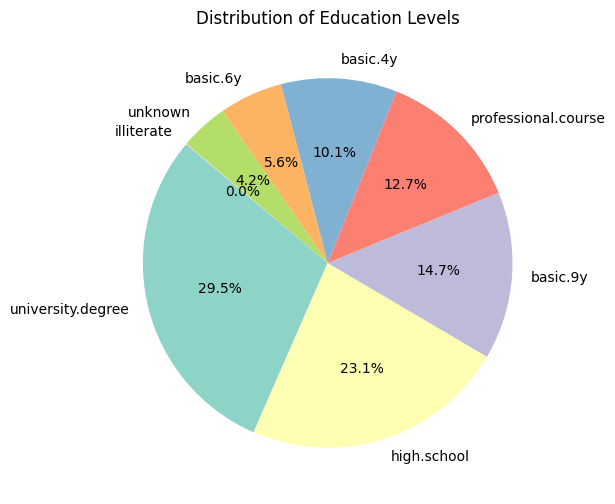

In [16]:
# pie chart for education
education_counts = df['education'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Education Levels')
plt.savefig('images/education_pie_chart.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

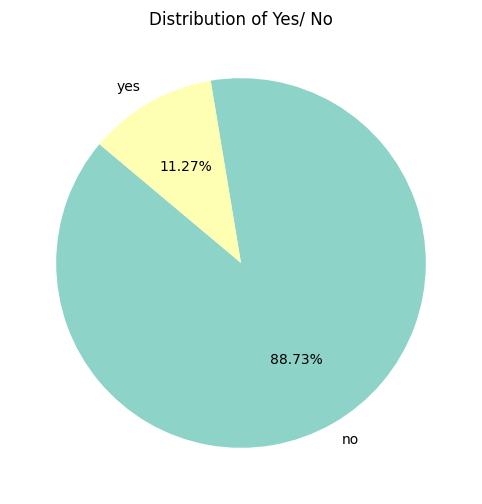

In [17]:
# pie chart for col y
yes_counts = df['y'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(yes_counts, labels=yes_counts.index, autopct='%1.2f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Distribution of Yes/ No')
plt.savefig('images/YesNo_pie_chart.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

Just 11.27% said 'yes'.  This data is very skewed, so we will need to balance the train and test data with stratify.

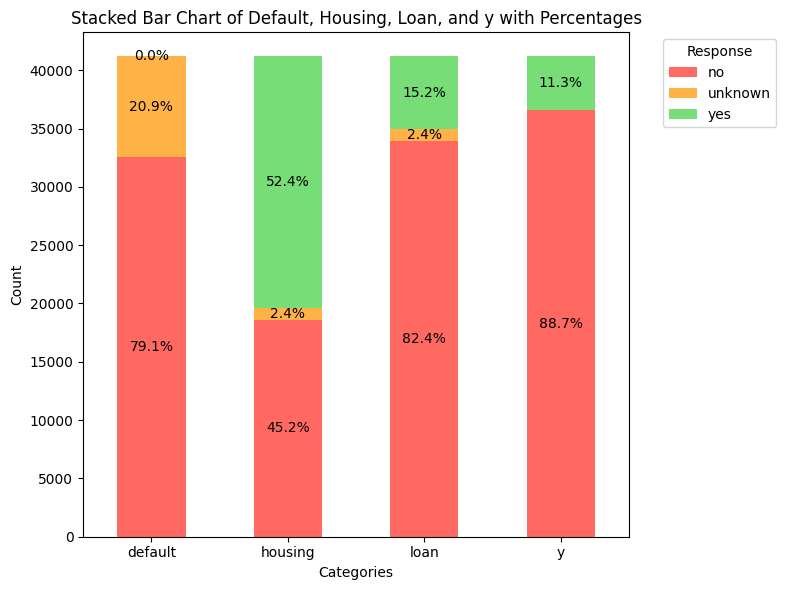

In [18]:
#show the binary results as one stacked bar chart
default_counts = df['default'].value_counts()
housing_counts = df['housing'].value_counts()
loan_counts = df['loan'].value_counts()
y_counts = df['y'].value_counts()
stacked_data = pd.DataFrame({
    'default': default_counts,
    'housing': housing_counts,
    'loan': loan_counts,
    'y': y_counts
}).fillna(0)

# # Calculate percentages
percentages = stacked_data.div(stacked_data.sum(axis=0), axis=1) * 100
# Plot the stacked bar chart
ax = stacked_data.T.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#FF6961', '#FFB347', '#77DD77'])
# Add percentages inside the bars
for i, col in enumerate(stacked_data.columns):
    for j, val in enumerate(stacked_data[col]):
        percent = percentages.iloc[j, i]
        if val > 0:
            ax.text(
                i,  # X position
                stacked_data.iloc[:j, i].sum() + val / 2,  # Y position
                f'{percent:.1f}%',  # Text with 1 decimal
                ha='center', va='center', fontsize=10, color='black'
            )
# Add labels and title
plt.title('Stacked Bar Chart of Default, Housing, Loan, and y with Percentages')
plt.ylabel('Count')
plt.xlabel('Categories')
plt.xticks(rotation=0)
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('images/stacked_bar_chart.png', format='png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

<Figure size 2000x2400 with 0 Axes>

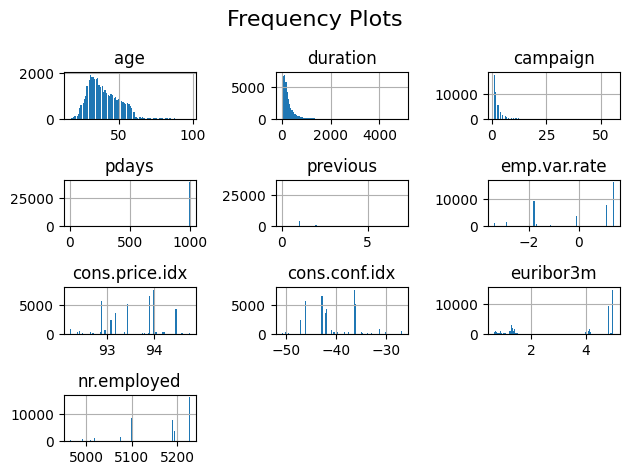

In [19]:
# frequency plots
plt.figure(figsize=(20,24))
df.hist(bins=100)
#plt.xlabel('Frequency')
plt.suptitle('Frequency Plots', fontsize=16)
plt.savefig('images/FreqPlots.png')
plt.tight_layout()
plt.show()

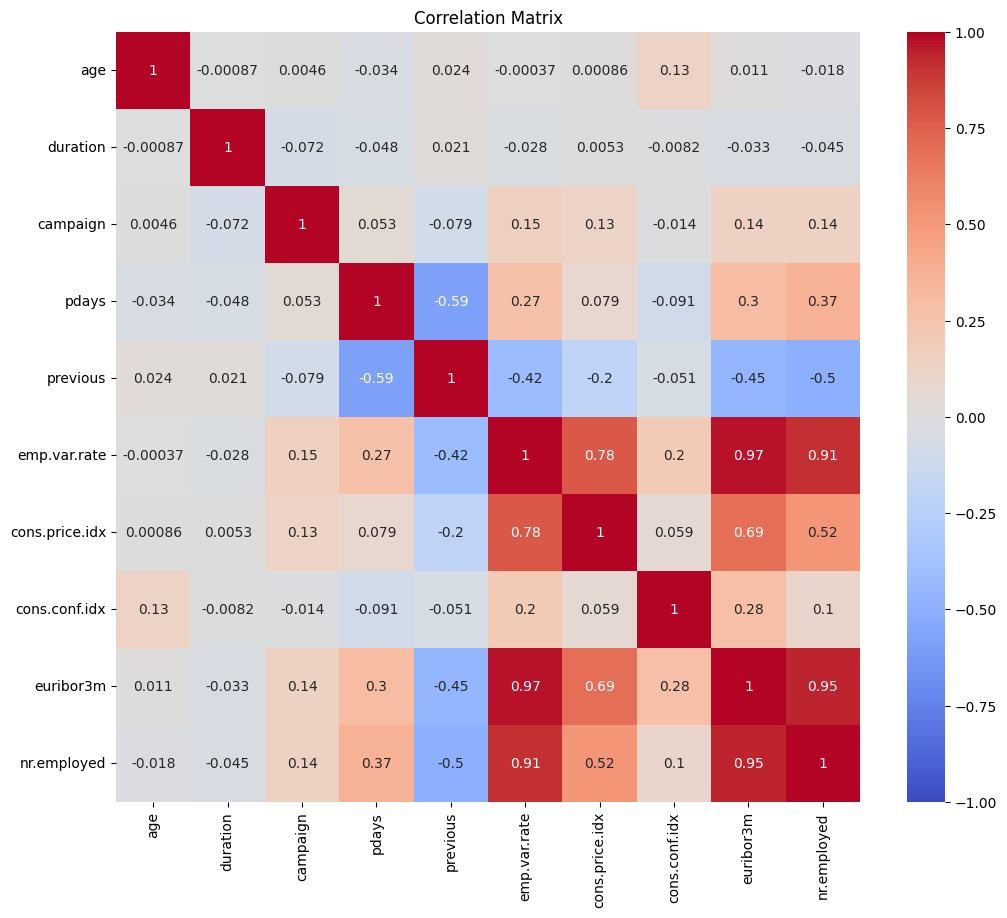

In [20]:
# Create a correlation heatmap with the numerical features
num_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('images/CorrMatrix.png')
plt.show()

We see high correlations between 3 features: euribor3m, emp.var.rate, and nr.employed.  euribor3m and emp.var.rate = 0.97, nr.employed and emp.var.rate = 0.91, and euribor3m and nr.employed = 0.95.  We can probably safely remove 2 of these 3 but since there is no issue with computing time or bad data in these features, we keep them all for now.

## Data Cleaning/ Checks

In [21]:
# Look at which features have blanks and how many total
print(df.isnull().sum(), '\n')
print(df.isnull().sum().sum(), '\n')

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64 

0 



In [22]:
# Check for duplicate rows
# Total number of rows
total_rows = len(df)
# Number of unique rows
unique_rows = len(df.drop_duplicates())

# Compare counts
print(f"Total rows: {total_rows}")
print(f"Unique rows: {unique_rows}")
print(f"Duplicate rows: {total_rows - unique_rows}")

Total rows: 41188
Unique rows: 41176
Duplicate rows: 12


In [23]:
# drop duplicate rows
df.drop_duplicates(inplace=True)

In [24]:
# convert 'month' to numerical values for regression
df['month'] = df['month'].replace({
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}).astype('float')

# convert 'day_of_week' to numerical values for regression
df['day_of_week'] = df['day_of_week'].replace({
    'mon': 1,
    'tue': 2,
    'wed': 3,
    'thu': 4,
    'fri': 5,
    'sat': 6,
    'sun': 7
}).astype('float')

<ipython-input-24-c22601f79fb0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['month'] = df['month'].replace({
<ipython-input-24-c22601f79fb0>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['day_of_week'] = df['day_of_week'].replace({


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  float64
 9   day_of_week     41176 non-null  float64
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

### Business Objective:<br>
The business objective is to analyze the data from a bank marketing campaign (from 17 sources) and see which types of customers had the highest likelihood of saying 'yes'.  The classification goal is to predict if the client will subscribe (yes/no) to a term deposit (variable y).  The results should allow a more focused campaign that will increase return-on-investment (ROI).

In [26]:
# show unique entries and make sure they're reasonable for OneHotEncoder
df.describe(include=['object','category'])

,job,marital,education,default,housing,loan,contact,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,3,2
top,admin.,married,university.degree,no,yes,no,cellular,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,35551,36537


Max 12 entries ('job') is fine for OneHotEncoder.  Total of 40 is fine as well.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [27]:
X = df.drop(['y'],axis=1)
y = df['y']

In [28]:
# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['number']).columns

print('Categorical columns: ',cat_cols)
print('Numerical columns: ',num_cols)

Categorical columns:  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')
Numerical columns:  Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [30]:
print("Columns in X_train:", X_train.columns.tolist())
print("Columns in X_test:", X_test.columns.tolist())

Columns in X_train: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Columns in X_test: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [31]:
# Check stratify (for kicks)
# Check proportions in the training set
yes_train_ratio = (y_train == 'yes').mean()
# Check proportions in the test set
yes_test_ratio = (y_test == 'yes').mean()

# Print the results
print(f"Proportion of 'yes' in y_train: {yes_train_ratio:.4f}")
print(f"Proportion of 'yes' in y_test: {yes_test_ratio:.4f}")

Proportion of 'yes' in y_train: 0.1127
Proportion of 'yes' in y_test: 0.1127


11.27% has been maintained and stratify worked

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [32]:
# create baseline model as logistic regression
start_time = time.time() #start recording time
dummy_clf = DummyClassifier().fit(X_train,y_train)
end_time = time.time() #end recording time
dummy_time = end_time-start_time

dummy_train_score = dummy_clf.score(X_test,y_test)
dummy_test_score = dummy_clf.score(X_test,y_test)
print('Dummy train time: ',dummy_time)
print('Dummy train score: ',dummy_train_score)
print('Dummy test score: ',dummy_test_score)

Dummy train time:  0.03920698165893555
Dummy train score:  0.8873239436619719
Dummy test score:  0.8873239436619719


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [33]:
# create logistic regression model
# encode categorical, scale remaining
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore',drop='if_binary'),cat_cols),remainder=StandardScaler())

#linear regression pipeline
start_time = time.time() #start recording time
lr_pipe = Pipeline([
    ('transformer',transformer),
    ('lr',LogisticRegression(max_iter=1000))
])
lr_pipe.fit(X_train,y_train)
end_time = time.time() #end recording time
lr_time = end_time-start_time

lr_train_score = lr_pipe.score(X_test,y_test)
lr_test_score = lr_pipe.score(X_test,y_test)
print('Logistic regression train time: ',lr_time)
print('Logistic regression train score: ',lr_train_score)
print('Logistic regression test score: ',lr_test_score)

Logistic regression train time:  0.8381845951080322
Logistic regression train score:  0.9096648858669257
Logistic regression test score:  0.9096648858669257


### Recursive Feature Elimination

In [34]:
# Check Recursive Feature Elimination, top 5
preprocessor = ColumnTransformer([
    ('ohe',OneHotEncoder(),cat_cols),
    ('scale',StandardScaler(),num_cols)
])

estimator = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=estimator,n_features_to_select=5)

pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('rfe',rfe)
])
pipeline.fit(X,y)

# Get the names of all features after preprocessing
all_columns = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get selected feature names and rankings
rfe_ranking = pipeline.named_steps['rfe'].ranking_

# Create a DataFrame with rankings
rfe_df = pd.DataFrame({
    'Feature': all_columns,
    'Ranking': rfe_ranking
}).sort_values(by='Ranking', ascending=True)

# Set ranking as the index
rfe_df.set_index('Ranking', inplace=True)

# Display the DataFrame
print("RFE Feature Rankings:")
print(rfe_df[:5])

# # Get selected feature names
# selected_features = pipeline.named_steps['rfe'].get_support()
# selected_feature_names = [all_columns[i] for i in range(len(all_columns)) if selected_features[i]]

# print("Selected features:", selected_feature_names)

RFE Feature Rankings:
                           Feature
Ranking                           
1        ohe__poutcome_nonexistent
1            scale__cons.price.idx
1                  scale__duration
1              scale__emp.var.rate
1            ohe__poutcome_failure


RFE with logistic regression tells us that the most impactful features are: cons.price.idx, 'emp.var.rate', education=illiterate, 'duration', and previous outcome='success'.<br>
It makes a lot of sense that the client's previous behavior (poutcome) has a large impact on the current response.  Duration also makes sense as an important feature because it's more personal time spent to capture the customer's business.  Employer variance rate makes sense as well because it's an indication of the customers' current finances (hiring if doing well, firing if not doing well).  Lastly, CPI is an important metric because it influences the Federal Reserve's decision-making on interest rates, which in turn affects the rates banks offer on CDs.<br>

I did expect 'nr.employed' to have a top 5 impact becuase if companies have more employees (a healthy economy), the market should be more likely to invest in things like CD's - but upon further inspection, the value seems to hover around ~5000 employees (min 4963, max 5228) so there is perhaps not enough spread to initiate a change in behavior.

### Problem 9: Score the Model

What is the accuracy of your model?

In [35]:
print('Accuracy of the Logistic Regression Model on test data: ',lr_train_score)

Accuracy of the Logistic Regression Model on test data:  0.9096648858669257


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [36]:
results = [] #create placeholder for results

In [37]:
# put in above dummy and logistic regression results
results.append({
    'Model': 'Dummy',
    'Train Time (s)': round(dummy_time, 5),
    'Train Accuracy': round(dummy_train_score, 5),
    'Test Accuracy': round(dummy_test_score, 5)
})

results.append({
    'Model': 'Logistic Regression',
    'Train Time (s)': round(lr_time, 5),
    'Train Accuracy': round(lr_train_score, 5),
    'Test Accuracy': round(lr_test_score, 5)
})


In [38]:
#KNN algorithm
start_time = time.time() #start recording time
knn_pipe = Pipeline([
    ('transformer',transformer),
    ('knn',KNeighborsClassifier())
])
knn_pipe.fit(X_train,y_train)
end_time = time.time() #end recording time
knn_time = end_time-start_time

knn_train_score = knn_pipe.score(X_train,y_train)
knn_test_score = knn_pipe.score(X_test,y_test)
print('KNN train time: ',knn_time)
print('KNN train score: ',knn_train_score)
print('KNN test score: ',knn_test_score)

results.append({
    'Model': 'KNN',
    'Train Time (s)': round(knn_time, 5),
    'Train Accuracy': round(knn_train_score, 5),
    'Test Accuracy': round(knn_test_score, 5)
})
knn_pipe

KNN train time:  0.1962118148803711
KNN train score:  0.92762598664238
KNN test score:  0.906750849927149


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object'))])),
                ('knn', KNeighborsClassifier())])

Decision tree train time:  0.41881799697875977
Decision tree train score:  1.0
Decision tree test score:  0.8919378338999514
Total number of nodes: 4801
Maximum depth of the tree: 29


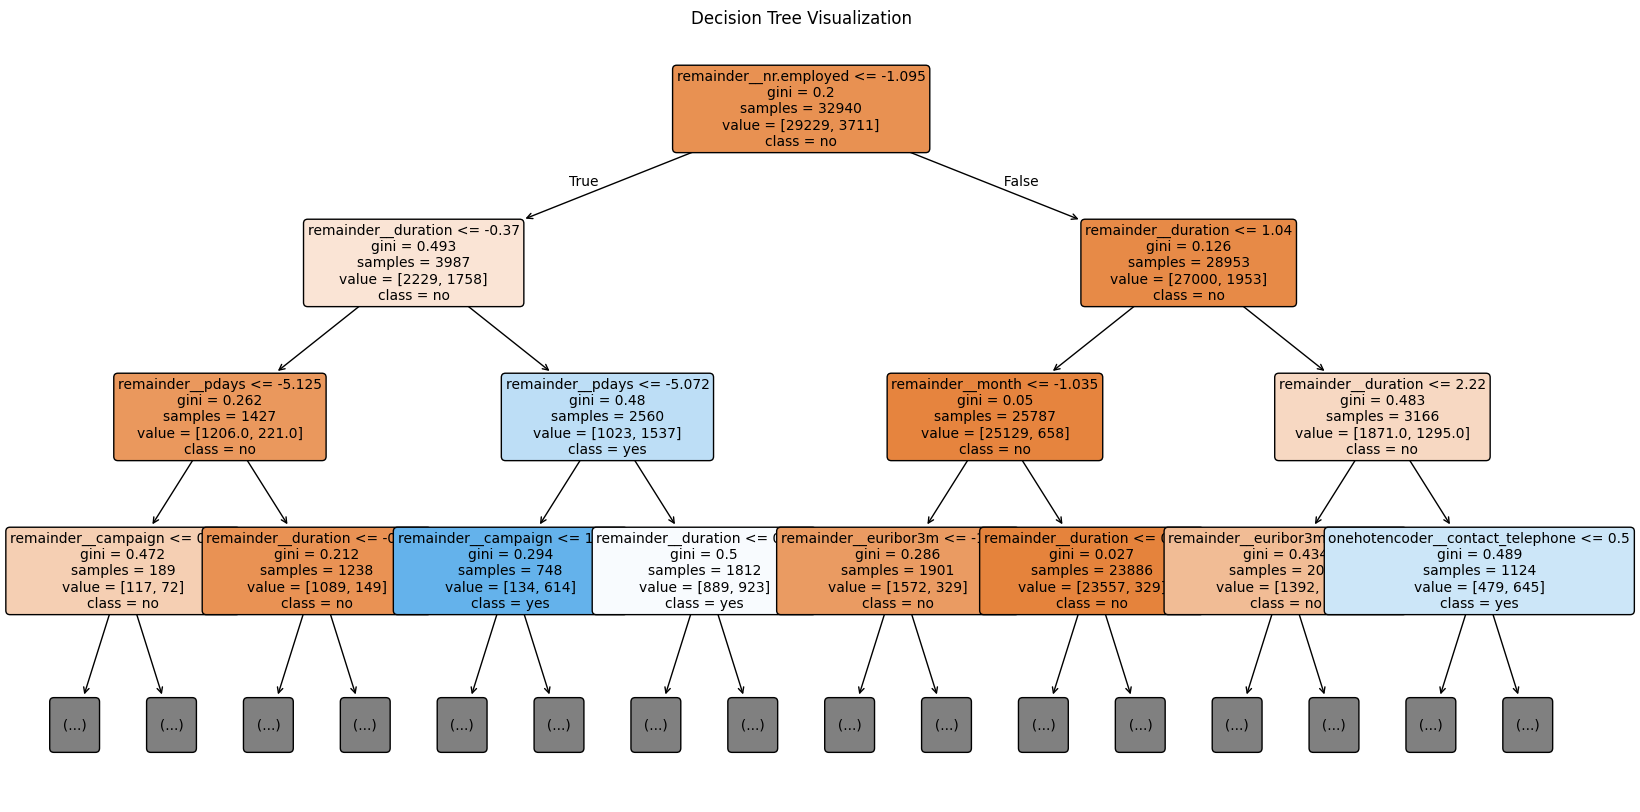

In [39]:
#Decision Tree algorithm
start_time = time.time() #start recording time
dtree_pipe = Pipeline([
    ('transformer',transformer),
    ('dtree',DecisionTreeClassifier())
])
dtree_pipe.fit(X_train,y_train)
end_time = time.time() #end recording time
dtree_time = end_time-start_time

dtree_train_score = dtree_pipe.score(X_train,y_train)
dtree_test_score = dtree_pipe.score(X_test,y_test)
print('Decision tree train time: ',dtree_time)
print('Decision tree train score: ',dtree_train_score)
print('Decision tree test score: ',dtree_test_score)

results.append({
    'Model': 'Decision Tree',
    'Train Time (s)': round(dtree_time, 5),
    'Train Accuracy': round(dtree_train_score, 5),
    'Test Accuracy': round(dtree_test_score, 5)
})
# print max nodes and depth
dtree_model = dtree_pipe.named_steps['dtree']
feature_names = list(transformer.get_feature_names_out())
dtree_nodes = dtree_model.tree_.node_count
dtree_depth = dtree_model.tree_.max_depth
print(f"Total number of nodes: {dtree_nodes}")
print(f"Maximum depth of the tree: {dtree_depth}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtree_model, feature_names=feature_names, class_names=[str(cls) for cls in dtree_model.classes_],filled=True,rounded=True,fontsize=10,max_depth=3)
plt.title('Decision Tree Visualization')
plt.savefig('images/decision_tree_plot.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
#SVM Models

#SVM linear
start_time = time.time() #start recording time
svc_lin_pipe = Pipeline([
    ('transformer',transformer),
    ('svc_lin',SVC(kernel='linear'))
])
svc_lin_pipe.fit(X_train,y_train)
end_time = time.time() #end recording time
svc_lin_time = end_time-start_time

svc_lin_train_score = svc_lin_pipe.score(X_train,y_train)
svc_lin_test_score = svc_lin_pipe.score(X_test,y_test)
print('SVC linear train time: ',svc_lin_time)
print('SVC linear train Score: ',svc_lin_train_score)
print('SVC linear test Score: ',svc_lin_test_score)

results.append({
    'Model': 'SVM Linear',
    'Train Time (s)': round(svc_lin_time, 5),
    'Train Accuracy': round(svc_lin_pipe.score(X_train, y_train), 5),
    'Test Accuracy': round(svc_lin_pipe.score(X_test, y_test), 5)
})
svc_lin_pipe

SVC linear train time:  43.61360216140747
SVC linear train Score:  0.9017304189435337
SVC linear test Score:  0.901287032540068


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object'))])),
                ('svc_lin', SVC(kernel='linear'))])

In [41]:
#SVM poly
start_time = time.time() #start recording time
svc_poly_pipe = Pipeline([
    ('transformer',transformer),
    ('svc_poly',SVC(kernel='poly'))
])
svc_poly_pipe.fit(X_train,y_train)
end_time = time.time() #end recording time
svc_poly_time = end_time-start_time

svc_poly_train_score = svc_poly_pipe.score(X_train,y_train)
svc_poly_test_score = svc_poly_pipe.score(X_test,y_test)
print('SVC poly train time: ',svc_poly_time)
print('SVC poly train score: ',svc_poly_train_score)
print('SVC poly test score: ',svc_poly_test_score)

results.append({
    'Model': 'SVM Poly',
    'Train Time (s)': round(svc_poly_time, 5),
    'Train Accuracy': round(svc_poly_pipe.score(X_train, y_train), 5),
    'Test Accuracy': round(svc_poly_pipe.score(X_test, y_test), 5)
})
svc_poly_pipe

SVC poly train time:  18.620104551315308
SVC poly train score:  0.9258044930176078
SVC poly test score:  0.9078436134045653


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object'))])),
                ('svc_poly', SVC(kernel='poly'))])

In [42]:
#SVM Gaussian
start_time = time.time() #start recording time
svc_rbf_pipe = Pipeline([
    ('transformer',transformer),
    ('svc_rbf',SVC(kernel='rbf'))
])
svc_rbf_pipe.fit(X_train,y_train)
end_time = time.time() #end recording time
svc_rbf_time = end_time-start_time

svc_rbf_train_score = svc_rbf_pipe.score(X_train,y_train)
svc_rbf_test_score = svc_rbf_pipe.score(X_test,y_test)
print('SVC Gaussian train time: ',svc_rbf_time)
print('SVC Gaussian train score: ',svc_rbf_train_score)
print('SVC Gaussian test score: ',svc_rbf_test_score)

results.append({
    'Model': 'SVM Gaussian',
    'Train Time (s)': round(svc_rbf_time, 5),
    'Train Accuracy': round(svc_rbf_pipe.score(X_train, y_train), 5),
    'Test Accuracy': round(svc_rbf_pipe.score(X_test, y_test), 5)
})
svc_rbf_pipe

SVC Gaussian train time:  15.821468591690063
SVC Gaussian train score:  0.9199149969641773
SVC Gaussian test score:  0.9113647401651287


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object'))])),
                ('svc_rbf', SVC())])

In [43]:
#SVM sigmoid
start_time = time.time() #start recording time
svc_sig_pipe = Pipeline([
    ('transformer',transformer),
    ('svc_sig',SVC(kernel='sigmoid'))
])
svc_sig_pipe.fit(X_train,y_train)
end_time = time.time() #end recording time
svc_sig_time = end_time-start_time

svc_sig_train_score = svc_sig_pipe.score(X_train,y_train)
svc_sig_test_score = svc_sig_pipe.score(X_test,y_test)
print('SVC sigmoid train time: ',svc_sig_time)
print('SVC sigmoid train score: ',svc_sig_train_score)
print('SVC sigmoid train score: ',svc_sig_test_score)

results.append({
    'Model': 'SVM Sigmoid',
    'Train Time (s)': round(svc_sig_time, 5),
    'Train Accuracy': round(svc_sig_pipe.score(X_train, y_train), 5),
    'Test Accuracy': round(svc_sig_pipe.score(X_test, y_test), 5)
})
svc_sig_pipe

SVC sigmoid train time:  20.305974006652832
SVC sigmoid train score:  0.8666059502125076
SVC sigmoid train score:  0.866318601262749


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object'))])),
                ('svc_sig', SVC(kernel='sigmoid'))])

In [44]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Time (s)  Train Accuracy  Test Accuracy
0                Dummy         0.03921         0.88732        0.88732
1  Logistic Regression         0.83818         0.90966        0.90966
2                  KNN         0.19621         0.92763        0.90675
3        Decision Tree         0.41882         1.00000        0.89194
4           SVM Linear        43.61360         0.90173        0.90129
5             SVM Poly        18.62010         0.92580        0.90784
6         SVM Gaussian        15.82147         0.91991        0.91136
7          SVM Sigmoid        20.30597         0.86661        0.86632


#### Model Selection

![image.png](attachment:e92ec446-c23f-49e3-94f0-0eb4010cc4cf.png)
KNN would be my selection as the best method with default settings. KNN took the least time to compute, being at least 2.6x faster and up to over 600x faster than the competition.  KNN had the second highest train accuracy, but arguably the best accuracy since the decision tree is most likely overfitting with a 1.0 accuracy (due to no branch limits).  Also, KNN did not sacrifice much on test accuracy (< 1% worse than the top results [SVM Poly and SVM Gaussian]) to achieve these quick results.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Grid Search CV

In [45]:
# GridSearchCV on Logistic Regression
lr_params = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}

lr_gridsearch = GridSearchCV(lr_pipe,lr_params,cv=5,n_jobs=-1)
lr_gridsearch.fit(X_train,y_train)
# Print best parameters and best score
print("Best Logistic Regression Parameters:", lr_gridsearch.best_params_)
print("Best Logistic Regression Cross-Validation Accuracy:", lr_gridsearch.best_score_)

Best Logistic Regression Parameters: {'lr__C': 0.1}
Best Logistic Regression Cross-Validation Accuracy: 0.9103825136612022


In [46]:
# GridsearchCV on KNN
knn_params = {
    'knn__n_neighbors': [3, 5, 7, 9, 11]
}

knn_gridsearch = GridSearchCV(knn_pipe,knn_params,cv=5,n_jobs=-1)
knn_gridsearch.fit(X_train,y_train)
# Print best parameters and best score
print("Best KNN Parameters:", knn_gridsearch.best_params_)
print("Best KNN Cross-Validation Accuracy:", knn_gridsearch.best_score_)

Best KNN Parameters: {'knn__n_neighbors': 11}
Best KNN Cross-Validation Accuracy: 0.9052823315118397


KNN score returned nan for some reason (I tried to troubleshoot, to no avail), so ran by all of them by hand.  I left it at the best accuracy, which was indeed n_neighbors=3.

In [47]:
start_time = time.time() #start recording time
knn_pipe = Pipeline([
    ('transformer',transformer),
    ('knn',KNeighborsClassifier(n_neighbors=3))
])
knn_pipe.fit(X_train,y_train)
end_time = time.time() #end recording time
knn_time = end_time-start_time

knn_train_score = knn_pipe.score(X_train,y_train)
knn_test_score = knn_pipe.score(X_test,y_test)
print('KNN train time: ',knn_time)
print('KNN train score: ',knn_train_score)
print('KNN test score: ',knn_test_score)

KNN train time:  0.24718236923217773
KNN train score:  0.9393442622950819
KNN test score:  0.8997085964060223


In the interest of time, I won't do GridSearchCV on all of the Classifiers.  The Train and Test accuracy is already excellent so we can conclude that for this dataset KNN is best with nearest neighbors = 3.

In [49]:

# For feature selection look at RFE, Logistic Regression, and Decision Tree results
# Show top 5 RFE results again
print("RFE Feature Rankings:")
print(rfe_df[:5])


# Get the trained logistic regression model
lr_model = lr_pipe.named_steps['lr']

# Logistic Regression results
# Extract feature names and coefficients
feature_names = transformer.get_feature_names_out()
coefficients = lr_model.coef_.flatten()
# Create a DataFrame
coef_df = pd.DataFrame({
    'LR Feature': feature_names,
    'LR Coefficient': coefficients
})
# Get all features sorted by absolute coefficient value
coef_df['LR Abs Coefficient'] = coef_df['LR Coefficient'].abs()
coef_df = coef_df.sort_values(by='LR Abs Coefficient', ascending=False)
coef_df['LR Coefficient'] = coef_df['LR Coefficient']
coef_df = coef_df.sort_values(by='LR Coefficient', ascending=False)
# Add rank as the index
coef_df.reset_index(drop=True, inplace=True)
coef_df.index += 1  # Start ranking from 1
# Display coefficients for logistic regression to compare to RFE
print("Top 10 Features by Absolute Coefficient Value:")
print(coef_df[['LR Feature', 'LR Abs Coefficient', 'LR Coefficient']].head(10))

# Decision Tree results
# Get feature importances
importances = dtree_model.feature_importances_
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'DT Feature': feature_names,
    'DT Importance': importances
})
# Rank features by importance
importance_df = importance_df.sort_values(by='DT Importance', ascending=False)
# Add ranking as the index
importance_df.reset_index(drop=True, inplace=True)
importance_df.index += 1  # Start index at 1 for ranking
# Display the ranked feature importance
print("Top 10 Feature Importance for Decision Tree:")
print(importance_df[:10])

RFE Feature Rankings:
                           Feature
Ranking                           
1        ohe__poutcome_nonexistent
1            scale__cons.price.idx
1                  scale__duration
1              scale__emp.var.rate
1            ohe__poutcome_failure
Top 10 Features by Absolute Coefficient Value:
                             LR Feature  LR Abs Coefficient  LR Coefficient
1                   remainder__duration            1.185092        1.185092
2             remainder__cons.price.idx            0.630942        0.630942
3                  remainder__euribor3m            0.584795        0.584795
4            onehotencoder__job_student            0.326351        0.326351
5            onehotencoder__job_retired            0.291898        0.291898
6              remainder__cons.conf.idx            0.210105        0.210105
7   onehotencoder__education_illiterate            0.167346        0.167346
8       onehotencoder__poutcome_success            0.151903        0.151903
9 

To rank each feature, we use Logistic Regression coefficient results.  We see that the most important features are:
1. emp.var.rate
2. duration
3. contact=telephone
4. euribor3m
5. cons.price
6. education=illiterate
7. poutcome=failure
8. nr.employed
9. poutcome=success
10. job=retired

From the numbering above, PFE's top 5 corresponded to #1, 2, 5, 6, 9.<br>

The Decision Tree also produces a ranking:
1.   duration
2.   nr.employed
3.   age
4.   euribor3m
5.   campaign
6.   day of the week
7.   pdays
8.   month
9.   housing=yes
10.  job=admin










The top features can be used as focus points for businesses.  For the best ROI, they should try to increase values listed above.<br>
Below, we also look at the bottom features.  Companies can look at the least impactful features and weigh the cost of gathering that data as a potential money saving effort.

In [52]:
# get the bottom features

print("Bottom RFE Feature Rankings:")
print(rfe_df[-5:])
# Display coefficients for logistic regression to compare to RFE
print("Bottom 10 Features by Absolute Coefficient Value:")
print(coef_df[['LR Feature', 'LR Abs Coefficient', 'LR Coefficient']].tail(10))

print("Bottom 10 Feature Importance for Decision Tree:")
print(importance_df[-10:])

Bottom RFE Feature Rankings:
                                  Feature
Ranking                                  
42                        scale__previous
43                     scale__day_of_week
44                    ohe__job_unemployed
45                       ohe__default_yes
46       ohe__education_university.degree
Bottom 10 Features by Absolute Coefficient Value:
                           LR Feature  LR Abs Coefficient  LR Coefficient
40         onehotencoder__housing_yes            0.297770       -0.297770
41    onehotencoder__marital_divorced            0.313418       -0.313418
42            onehotencoder__loan_yes            0.316074       -0.316074
43  onehotencoder__education_basic.9y            0.341091       -0.341091
44     onehotencoder__job_blue-collar            0.343609       -0.343609
45             remainder__nr.employed            0.386188       -0.386188
46     onehotencoder__default_unknown            0.617814       -0.617814
47    onehotencoder__poutcome_failu

## Confusion Matrix

The confusion matrix and accompanying metrics are shown below.  

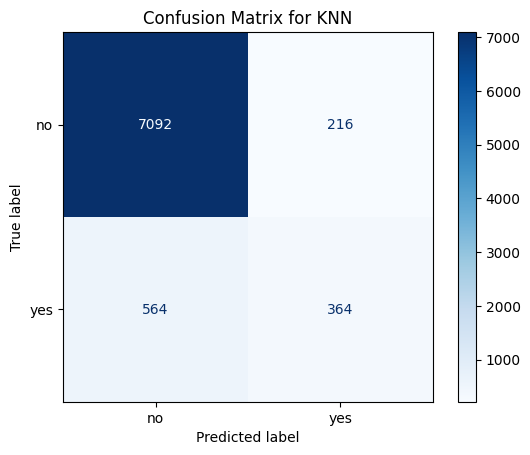

In [64]:
# confusion matrix for knn

y_pred = knn_gridsearch.best_estimator_.predict(X_test)
y_proba = knn_gridsearch.best_estimator_.predict_proba(X_test)[:, 1]
# compute the confusion matrix
cm = confusion_matrix(y_test,y_pred)
# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_gridsearch.classes_)
disp.plot(cmap='Blues')  # Choose a color map (e.g., 'Blues', 'viridis', etc.)

plt.title("Confusion Matrix for KNN")
plt.savefig('images/KNNConfusionMatrix.png')
plt.show()

In [67]:
# display metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
specificity = tn / (tn + fp)  # True Negative Rate
#f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_proba)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
#print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.9053
Precision: 0.6276
Recall: 0.3922
Specificity: 0.9704
AUC-ROC: 0.9050


The accuracy is very high at .905 so 90.5% of the predictions are correct.<br>
The precision is only 0.627, which means that only 62.7% of the positives were correctly identified.  False positives are not a big issue because the consequence is just that the sales person spent some time on someone that did not say yes.<br>
The recall is 0.392, which means only 39.2% of the positives were correctly identified.  This is of greater consequence because this situation is if a 'yes' slips by.  Given that only 11.27% of leads say 'yes', this is a big deal<br>
The specificity of 0.970 shows that 97% of negatives were correctly identified.  This is not very important because if someone is a 'no' it is of little consequence to the business.<br>
Finally, the AUC-ROC score of .905 means that there's a 90.5% chance that the model will be able to distinguish between positive and negative classes.  A very good score.

##### Questions